## Author: Priya Chakradhari  
## Focus: Exploratory Data Analysis & Machine Learning – Car Price Prediction Dataset
> "TThis notebook performs EDA on a car price dataset to analyze the impact of features like year, mileage, fuel type, and brand on car prices, and then builds a machine learning regression model to predict car prices."
## LinkedIn: https://www.linkedin.com/in/priya-chakradhari/  
## GitHub: https://github.com/priyachakradhari  
## Twitter(X): https://x.com/PriyaChakr87701

# Dataset Description

The dataset contains information about used cars listed for sale, including details about the car model, brand, manufacturing year, price, distance driven, and fuel type. Each row represents a single car listing.

**Columns:**

* **name**: Full name and variant of the car (e.g., *Hyundai Santro Xing XO eRLX Euro III*, *Ford EcoSport Titanium 1.5L TDCi*). This column contains detailed model and variant information.
* **company**: The manufacturer or brand of the car (e.g., Hyundai, Mahindra, Maruti, Ford).
* **year**: The manufacturing year of the car. This is a numeric feature indicating how old the car is.
* **Price**: The listed selling price of the car. This column contains numeric values as well as non-numeric entries like **"Ask For Price"**, so it requires cleaning before modeling.
* **kms_driven**: The total distance driven by the car, stored as text with units (e.g., *45,000 kms*, *40 kms*). This needs to be converted into a numeric feature.
* **fuel_type**: The type of fuel used by the car, such as *Petrol* or *Diesel*. Some values may be missing and need to be handled during preprocessing.

Overall, the dataset mixes numeric and categorical features and requires preprocessing and cleaning before performing exploratory data analysis and building a car price prediction model.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/car-dataset-csv/quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.shape 

(892, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [6]:
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [7]:
df.kms_driven.unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [8]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [9]:
df.company.unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [10]:
back_up = df.copy()

In [11]:
back_up.copy().head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


## Dataset Cleaning Observations

While cleaning the car price prediction dataset, I observed and fixed the following issues:

1. **Year Column**
   - Converted the data type from `object` to `int`.
   - Removed rows containing invalid or useless values.

2. **Price Column**
   - Removed rows with the value **"Ask For Price"**.
   - Removed non-numeric characters from the column.
   - Converted the column from `object` to `int`.

3. **Kms_Driven Column**
   - Extracted only the numeric part and converted it to `int`.
   - Fixed incorrect values where text (e.g., fuel type) was mixed with kilometer values.

4. **Fuel_Type Column**
   - Handled missing (`NaN`) values.

5. **Company Column**
   - Standardized company names by keeping only the first word of the name.
   - Removed rows with useless or invalid company names.

6. **Name Column**
   - Cleaned and standardized car names by removing inconsistent or unnecessary values.


# Data Cleaning 

## year column

In [12]:
df = df[df.year.str.isnumeric()]

In [13]:
df['year'] = df['year'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


## Price column

In [15]:
df = df[df['Price'] != 'Ask For Price']

In [16]:
df['Price']=df['Price'].str.replace(',', '').astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


# kms_driven column

In [18]:
df = df[df['kms_driven'] != 'Petrol']

In [19]:
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',', '').astype(int)

## Fuel column

In [20]:
df = df[~df.fuel_type.isna()] # ~ is use to exclude the values/ rows/ columns

## name column

In [21]:
df['name'] = df.name.str.split(' ').str.slice(0,3).str.join(" ")

In [22]:
df.reset_index(drop = True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [23]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


## Removing Outlier

In [24]:
df = df[df['Price'] <6000000 ].reset_index(drop=True) #its an outliner 

In [25]:
df.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


## Save the clean dataset

In [26]:
df.to_csv('clean_df.csv')

## EDA

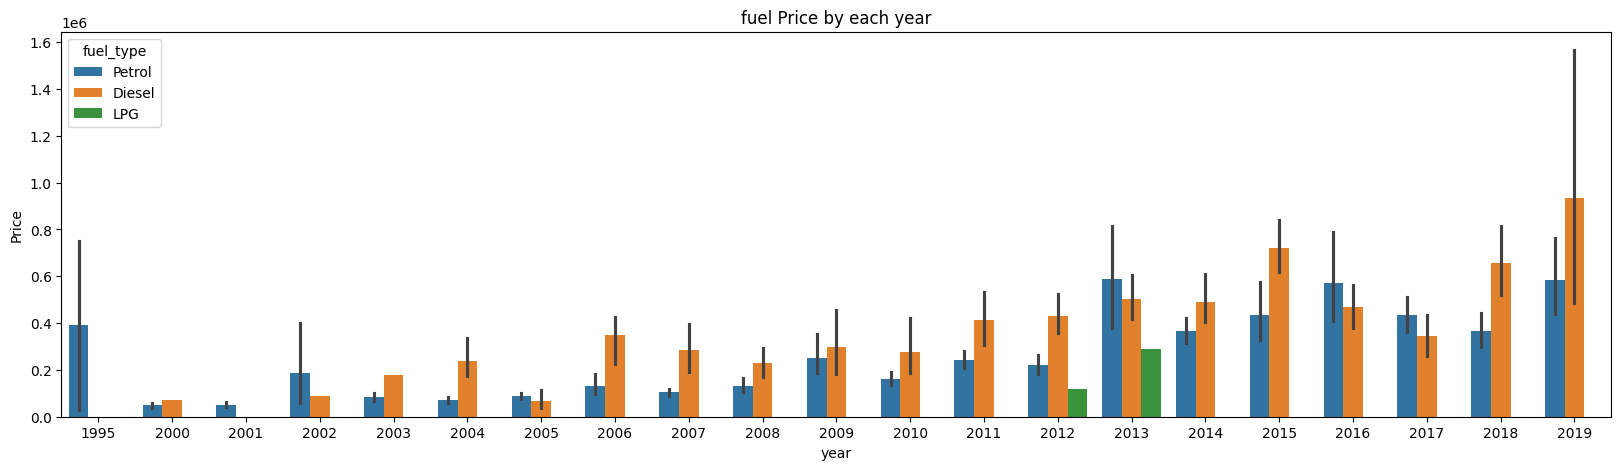

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(x =  df['year'], y = df['Price'], hue = df['fuel_type'])
plt.title("fuel Price by each year")
plt.show()

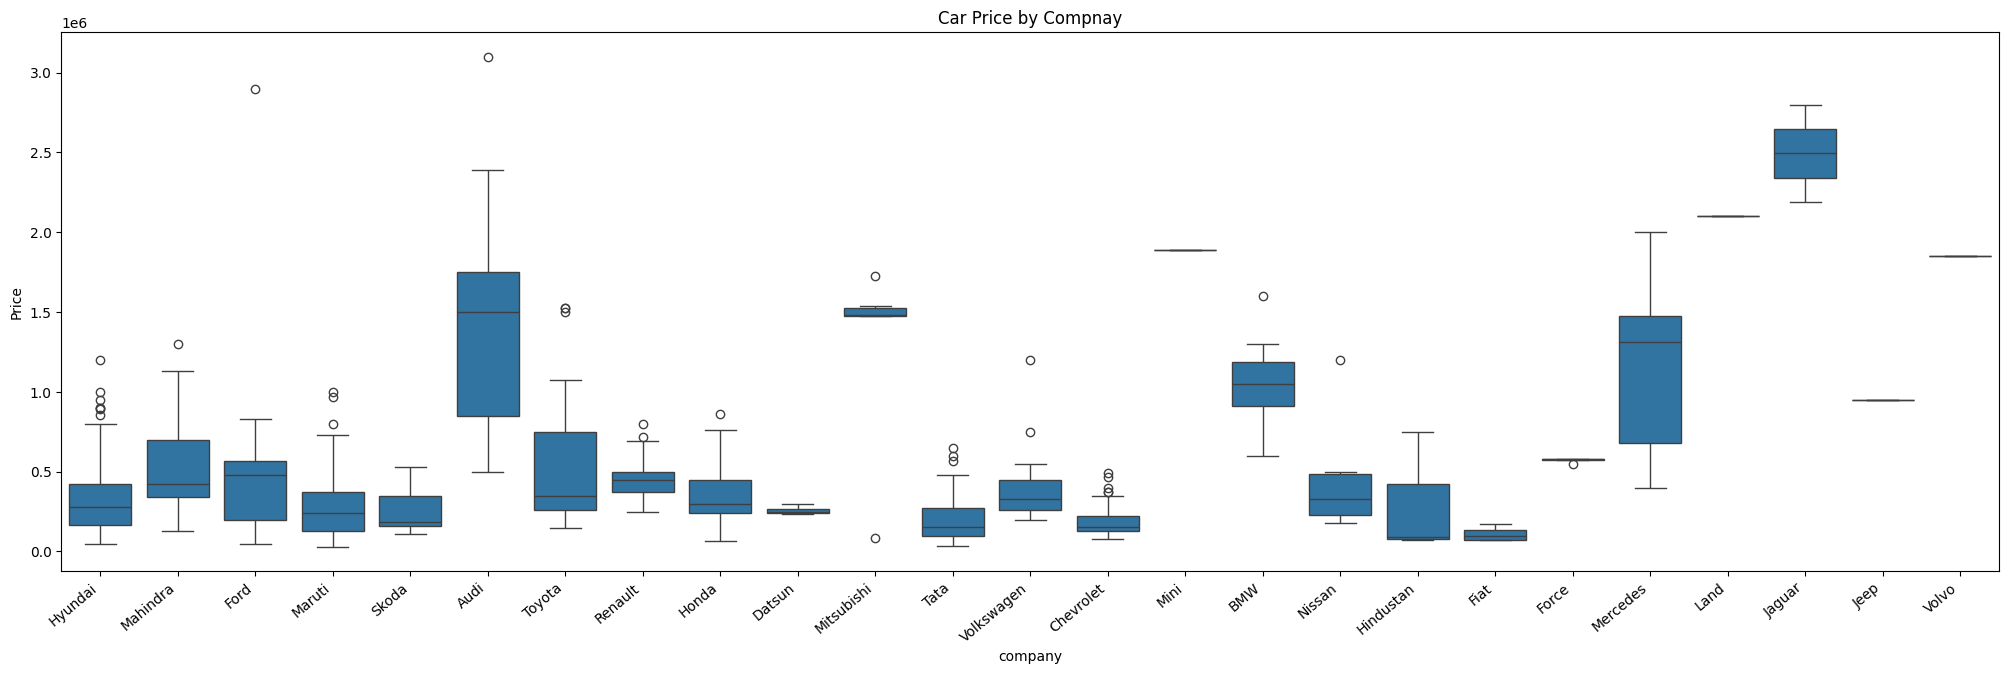

In [28]:
plt.subplots(figsize=(25,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title("Car Price by Compnay")
plt.show()

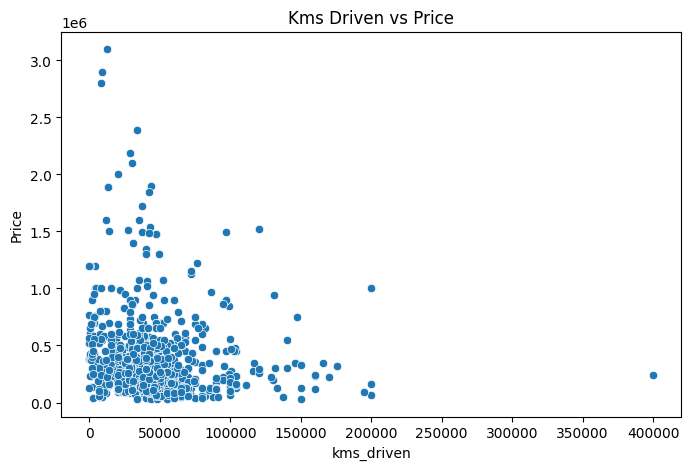

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="kms_driven", y="Price")
plt.title("Kms Driven vs Price")
plt.show()

Observation:

> - Price increases with newer year: Cars from recent years (2013–2019) have noticeably higher average prices than older models.

> - Fuel type matters: Diesel cars generally have higher prices than Petrol, while LPG cars are the cheapest across most years.

> - Strong brand effect: Premium brands (e.g., BMW, Audi, Mercedes, Land Rover, Jaguar) show much higher median prices and wider price ranges than mass-market brands (Maruti, Hyundai, Tata, etc.).

>  - High price variability within companies: Some companies (like BMW, Audi, Mercedes) have large spreads, indicating a wide range of models and prices.

> - Kms Driven vs Price shows negative trend: As kilometers driven increase, car price generally decreases (depreciation effect).

## Train Test split

In [30]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Feature Encoding

In [31]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

col_transform = make_column_transformer(
    (ohe, ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

##  Pipeline

In [32]:
lr = LinearRegression()

pipe = make_pipeline(col_transform, lr)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

In [33]:
# X = df.drop('Price', axis=1)
# y = df['Price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# col_transform = make_column_transformer(
#     (ohe, ['name', 'company', 'fuel_type']),
#     remainder='passthrough'
# )

# lr = LinearRegression()

# pipe = make_pipeline(col_transform, lr)

# pipe.fit(X_train, y_train)

# y_pred = pipe.predict(X_test)

# Model Evaluation

In [34]:
r2_score(y_test, y_pred)

0.642441535225351

In [35]:
# Find the best r2_score
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(col_transform,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [36]:
np.argmax(scores)

np.int64(655)

In [37]:
# Train model with that sample

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(col_transform,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9198145776316172

In [38]:
# Finding model score 
print(r2_score(y_test, y_pred)*100)

91.98145776316173
